<a href="https://colab.research.google.com/github/supriyaohdar/Book-Price-Prediction/blob/main/BookPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [510]:
import pandas as pd
import numpy as np

In [511]:
#from google.colab import files
#uploaded=files.upload()

In [512]:
traindata=pd.read_excel("Data_Train.xlsx")
testdata=pd.read_excel("Data_Test.xlsx")
traindata.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [513]:
testdata.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [514]:
traindata.shape


(6237, 9)

In [515]:
testdata.shape

(1560, 8)

In [516]:
testdata.tail(10)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
1550,A Song of Ice and Fire - A Game of Thrones: Th...,George R R Martin,"Paperback,– 5 Jan 2016",4.5 out of 5 stars,296 customer reviews,HBO’s hit series A Game of Thrones is based on...,Action & Adventure (Books),Action & Adventure
1551,"Goodbye, Things – The New Japanese Minimalism",Fumio Sasaki,"Hardcover,– 11 Apr 2017",4.8 out of 5 stars,13 customer reviews,The best-selling phenomenon from Japan that sh...,Home & House Maintenance (Books),Sports
1552,Five Comic One-Act Plays (Dover Thrift Editions),Anton Pavlovich Chekhov,"Paperback,– 2 Jul 1999",5.0 out of 5 stars,1 customer review,One of the foremost dramatists of the 19th cen...,Plays (Books),Humour
1553,Left Politics in Bengal,Monobina Gupta,"Paperback,– 2010",4.0 out of 5 stars,1 customer review,This remarkable book traces the Left Front gov...,Government (Books),Politics
1554,Guardians of Being,Eckhart Tolle,"Paperback,– 15 Nov 2011",3.6 out of 5 stars,6 customer reviews,"A noted author and the creator of the ""Mutts"" ...",Mental & Spiritual Healing,Humour
1555,100 Things Every Designer Needs to Know About ...,Susan Weinschenk,"Paperback,– 14 Apr 2011",5.0 out of 5 stars,4 customer reviews,We design to elicit responses from people. We ...,Design,"Computing, Internet & Digital Media"
1556,"Modern Letter Writing Course: Personal, Busine...",ARUN SAGAR,"Paperback,– 8 May 2013",3.6 out of 5 stars,13 customer reviews,"A 30-day course to write simple, sharp and att...",Children's Reference (Books),"Biographies, Diaries & True Accounts"
1557,The Kite Runner Graphic Novel,Khaled Hosseini,"Paperback,– 6 Sep 2011",4.0 out of 5 stars,5 customer reviews,The perennial bestseller-now available as a se...,Humour (Books),Humour
1558,Panzer Leader (Penguin World War II Collection),Heinz Guderian,"Paperback,– 22 Sep 2009",3.5 out of 5 stars,3 customer reviews,Heinz Guderian - master of the Blitzkrieg and ...,United States History,"Biographies, Diaries & True Accounts"
1559,Complete Spanish Step-by-Step,Barbara Bregstein,"Paperback,– 16 Sep 2016",4.5 out of 5 stars,2 customer reviews,Learn Spanish with the most convenient and eff...,Dictionaries,"Language, Linguistics & Writing"


In [517]:
traindata.describe(include='all')

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
count,6237,6237,6237,6237,6237,6237,6237,6237,6237.000000
unique,5568,3679,3370,36,342,5549,345,11,NaN
top,A Game of Thrones (A Song of Ice and Fire),Agatha Christie,"Paperback,– 5 Oct 2017",5.0 out of 5 stars,1 customer review,A Tinkle Double Digest is two Tinkle Digests i...,Action & Adventure (Books),Action & Adventure,NaN
freq,4,69,48,1375,1040,8,947,818,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.707516
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,690.110657
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.180000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000


In [518]:
testdata.describe(include='all')

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
count,1560,1560,1560,1560,1560,1560,1560,1560
unique,1521,1224,1259,30,163,1519,225,11
top,The Five Greatest Warriors (Jack West Series),Agatha Christie,"Paperback,– 2016",5.0 out of 5 stars,1 customer review,A Guardian Pick for 2019\nThe People vs. Putin...,Action & Adventure (Books),Action & Adventure
freq,3,18,12,376,288,3,236,218


In [519]:
traindata.dtypes

Title            object
Author           object
Edition          object
Reviews          object
Ratings          object
Synopsis         object
Genre            object
BookCategory     object
Price           float64
dtype: object

In [520]:
testdata.dtypes

Title           object
Author          object
Edition         object
Reviews         object
Ratings         object
Synopsis        object
Genre           object
BookCategory    object
dtype: object

In [521]:
traindata.drop(columns=['Title', 'Synopsis', 'Genre','BookCategory','Reviews','Ratings'], inplace=True)
testdata.drop(columns=['Title',  'Synopsis', 'Genre','BookCategory','Reviews','Ratings'], inplace=True)
traindata.head()

,Author,Edition,Price
0,Chris Kuzneski,"Paperback,– 10 Mar 2016",220.00
1,Arun Khopkar,"Paperback,– 7 Nov 2012",202.93
2,Thomas Hobbes,"Paperback,– 25 Feb 1982",299.00
3,Agatha Christie,"Paperback,– 5 Oct 2017",180.00
4,Editors of Life,"Hardcover,– 10 Oct 2006",965.62


In [522]:

traindata['Edition Type'] = traindata['Edition'].str.split('–').str[0].str.replace(',', '')
traindata['Edition Year'] = traindata['Edition'].str.split(' ').str[-1]
traindata.head()


,Author,Edition,Price,Edition Type,Edition Year
0,Chris Kuzneski,"Paperback,– 10 Mar 2016",220.00,Paperback,2016
1,Arun Khopkar,"Paperback,– 7 Nov 2012",202.93,Paperback,2012
2,Thomas Hobbes,"Paperback,– 25 Feb 1982",299.00,Paperback,1982
3,Agatha Christie,"Paperback,– 5 Oct 2017",180.00,Paperback,2017
4,Editors of Life,"Hardcover,– 10 Oct 2006",965.62,Hardcover,2006


In [523]:
traindata.drop(columns=['Edition'], inplace=True)
traindata.head()

,Author,Price,Edition Type,Edition Year
0,Chris Kuzneski,220.00,Paperback,2016
1,Arun Khopkar,202.93,Paperback,2012
2,Thomas Hobbes,299.00,Paperback,1982
3,Agatha Christie,180.00,Paperback,2017
4,Editors of Life,965.62,Hardcover,2006


In [524]:
traindata.dtypes

Author           object
Price           float64
Edition Type     object
Edition Year     object
dtype: object

In [525]:
traindata['Edition Type'].value_counts()

Paperback                5193
Hardcover                 823
Mass Market Paperback     155
Sheet music                24
Flexibound                 15
Cards                       8
Spiral-bound                4
Tankobon Softcover          3
Loose Leaf                  2
Leather Bound               1
(German)Paperback           1
Product Bundle              1
(Spanish)Paperback          1
Board book                  1
Plastic Comb                1
Library Binding             1
Perfect Paperback           1
(French)Paperback           1
(Kannada)Paperback          1
Name: Edition Type, dtype: int64

In [526]:
traindata['Edition Year'].value_counts()

2018         811
2017         757
2016         659
2015         519
2014         402
            ... 
1905           1
1969           1
1925           1
1961           1
Facsimile      1
Name: Edition Year, Length: 64, dtype: int64

In [527]:
traindata['Author'].value_counts()

Agatha Christie                 69
Ladybird                        49
DK                              48
Albert Uderzo                   34
Herge                           34
                                ..
Mark Verstegen                   1
Pustak Mahal Editorial Board     1
A.J. Thomson                     1
Trenton Lee Stewart              1
K. Somasundaram                  1
Name: Author, Length: 3679, dtype: int64

In [528]:
testdata['Edition Type'] = testdata['Edition'].str.split('–').str[0].str.replace(',', '')
testdata['Edition Year'] = testdata['Edition'].str.split(' ').str[-1]
testdata.head()

,Author,Edition,Edition Type,Edition Year
0,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",Mass Market Paperback,1986
1,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",Paperback,2018
2,Danielle Steel,"Paperback,– 17 Mar 2011",Paperback,2011
3,Allen B. Downey,"Paperback,– 2016",Paperback,2016
4,Redman Gairns,"Paperback,– 26 Dec 2011",Paperback,2011


In [529]:
testdata.shape

(1560, 4)

In [530]:
testdata.drop('Edition',axis=1,inplace=True)
testdata.head()

,Author,Edition Type,Edition Year
0,Sir Arthur Conan Doyle,Mass Market Paperback,1986
1,Gabriel N. Schenker,Paperback,2018
2,Danielle Steel,Paperback,2011
3,Allen B. Downey,Paperback,2016
4,Redman Gairns,Paperback,2011


In [531]:
testdata['Edition Type'].value_counts()


Paperback                1265
Hardcover                 233
Mass Market Paperback      45
Sheet music                 8
Flexibound                  4
Spiral-bound                2
(Chinese)Paperback          1
Cards                       1
Loose Leaf                  1
Name: Edition Type, dtype: int64

[]

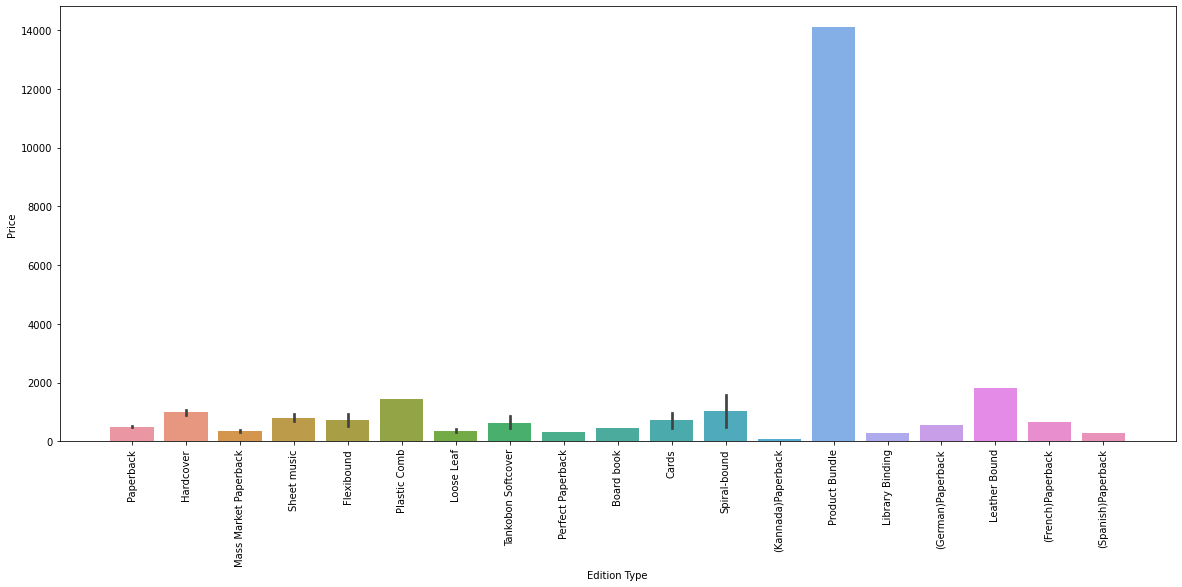

In [532]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

plt.figure(figsize=(20, 8))
sns.barplot(x=traindata['Edition Type'], y=traindata['Price'])
plt.xticks(rotation=90)
plt.plot()

In [533]:
#plt.figure(figsize=(20, 8))
#sns.barplot(x=traindata['Author'], y=traindata['Price'])
#plt.xticks(rotation=90)
#plt.plot()

[]

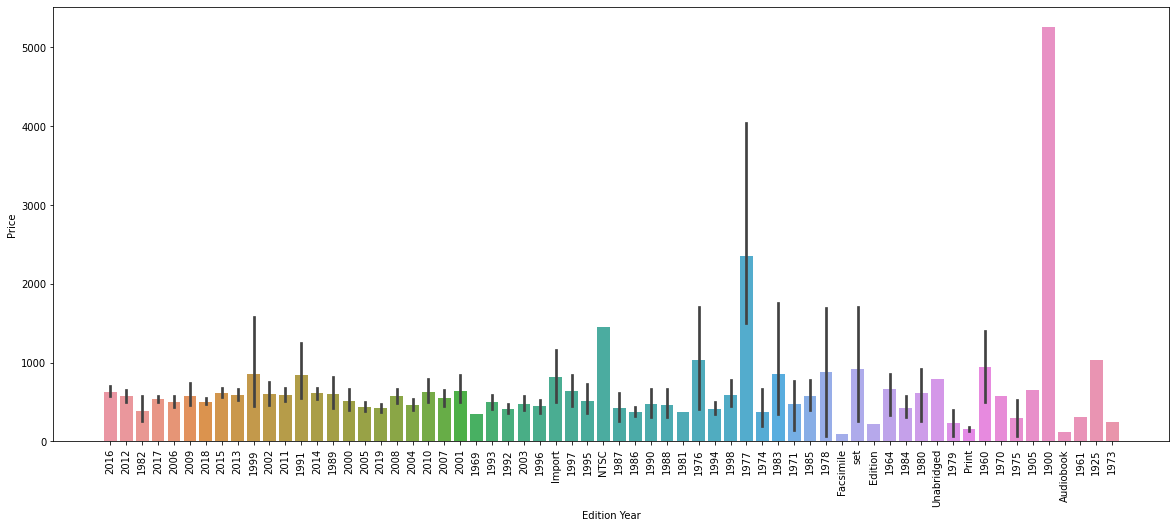

In [534]:
plt.figure(figsize=(20, 8))
sns.barplot(x=traindata['Edition Year'], y=traindata['Price'])
plt.xticks(rotation=90)
plt.plot()

In [535]:
pd.set_option('display.max_rows', 50)
x1 = traindata[traindata['Edition Year'].apply(lambda x: str(x).isalpha())]
x1

,Author,Price,Edition Type,Edition Year
169,Nelson Mandela,418.0,Paperback,Import
235,Willard A. Palmer,1453.0,Plastic Comb,NTSC
582,Barrington Barber,415.0,Paperback,Import
972,"Ivan Hissey, Curtis Tappenden",445.0,Paperback,Import
1233,Bhakti Mathur,277.0,Paperback,Import
1558,James Hadley Chase,100.0,Hardcover,Facsimile
1605,Syal,399.0,Paperback,set
1631,Ace McCloud,709.0,Paperback,Import
1643,William Shakespeare,220.0,Paperback,Edition
1769,Rick Smolan,2248.0,Hardcover,set


In [536]:
pd.set_option('display.max_rows', 50)
x2 = testdata[testdata['Edition Year'].apply(lambda x: str(x).isalpha())]
x2

,Author,Edition Type,Edition Year
97,Preeti Shenoy,Paperback,Print
178,"Jason Quinn, Sachin Nagar",Paperback,Illustrated
396,Paul Lockhart,Paperback,Print
579,A.S. Dulat,Hardcover,Import
955,ESPN Cricinfo,Paperback,Print
1179,Sam Lake,Hardcover,set
1191,Steve Haines,Paperback,Import
1408,Frank Miller,Paperback,set
1541,"Ivan Hissey, Curtis Tappenden",Paperback,Import


In [537]:
testdata.tail

<bound method NDFrame.tail of                       Author           Edition Type Edition Year
0     Sir Arthur Conan Doyle  Mass Market Paperback         1986
1        Gabriel N. Schenker              Paperback         2018
2             Danielle Steel              Paperback         2011
3            Allen B. Downey              Paperback         2016
4              Redman Gairns              Paperback         2011
...                      ...                    ...          ...
1555        Susan Weinschenk              Paperback         2011
1556              ARUN SAGAR              Paperback         2013
1557         Khaled Hosseini              Paperback         2011
1558          Heinz Guderian              Paperback         2009
1559       Barbara Bregstein              Paperback         2016

[1560 rows x 3 columns]>

In [538]:
testdata.shape

(1560, 3)

In [539]:
traindata = traindata[traindata['Edition Year'].apply(lambda x: str(x).isdigit())]

In [540]:
traindata.dtypes

Author           object
Price           float64
Edition Type     object
Edition Year     object
dtype: object

In [541]:
testdata.shape

(1560, 3)

In [542]:
testdata.tail(5)

,Author,Edition Type,Edition Year
1555,Susan Weinschenk,Paperback,2011
1556,ARUN SAGAR,Paperback,2013
1557,Khaled Hosseini,Paperback,2011
1558,Heinz Guderian,Paperback,2009
1559,Barbara Bregstein,Paperback,2016


In [543]:
traindata['Edition Year'] = traindata['Edition Year'].astype('int64')

In [544]:
traindata.dtypes

Author           object
Price           float64
Edition Type     object
Edition Year      int64
dtype: object

In [545]:
testdata.shape

(1560, 3)

In [546]:
testdata.tail(5)

,Author,Edition Type,Edition Year
1555,Susan Weinschenk,Paperback,2011
1556,ARUN SAGAR,Paperback,2013
1557,Khaled Hosseini,Paperback,2011
1558,Heinz Guderian,Paperback,2009
1559,Barbara Bregstein,Paperback,2016


In [547]:
dummy_test = testdata
dummy_test = dummy_test[dummy_test['Edition Year'].apply(lambda x: str(x).isdigit())]

In [548]:
Min = dummy_test['Edition Year'].min()
Max = dummy_test['Edition Year'].max()

In [549]:
print(type(Min))
print(type(Max))

<class 'str'>
<class 'str'>


In [550]:
x = testdata['Edition Year'].min()
type(x)

str

In [551]:
testdata['Edition Year'].max()

'set'

In [552]:
min = str(Min)
type(min)

str

In [553]:
import random

testdata['Edition Year'] = testdata['Edition Year'].apply(
    lambda x: str(x) if str(x).isdigit() else random.randint(int(Min),int(Max)))
                                             

#testdata.reset_index(inplace=True)

#print(random.rand(str(Min), str(Max)))

In [554]:
testdata.shape

(1560, 3)

In [555]:
testdata.tail(5)

,Author,Edition Type,Edition Year
1555,Susan Weinschenk,Paperback,2011
1556,ARUN SAGAR,Paperback,2013
1557,Khaled Hosseini,Paperback,2011
1558,Heinz Guderian,Paperback,2009
1559,Barbara Bregstein,Paperback,2016


In [556]:
testdata.dtypes

Author          object
Edition Type    object
Edition Year    object
dtype: object

In [557]:
testdata['Edition Year']=testdata['Edition Year'].astype('int64')
testdata.dtypes

Author          object
Edition Type    object
Edition Year     int64
dtype: object

In [558]:
testdata.shape

(1560, 3)

In [559]:
testdata.tail(5)

,Author,Edition Type,Edition Year
1555,Susan Weinschenk,Paperback,2011
1556,ARUN SAGAR,Paperback,2013
1557,Khaled Hosseini,Paperback,2011
1558,Heinz Guderian,Paperback,2009
1559,Barbara Bregstein,Paperback,2016


In [560]:
traindata['Edition Year'].corr(traindata.Price)

-0.0248136947601535

In [561]:
traindata.corr()

,Price,Edition Year
Price,1.000000,-0.024814
Edition Year,-0.024814,1.000000


checking label encoding

In [562]:
set(traindata['Author'])==set(testdata['Author'])

False

In [563]:
set(traindata['Edition Type'])==set(testdata['Edition Type'])

False

In [564]:
traindata['Edition Type'] = traindata['Edition Type'].replace(['Tankobon Softcover',
                                                                 'Loose Leaf',
                                                                 'Board book',
                                                                 'Leather Bound',
                                                                 'Product Bundle',
                                                                 'Library Binding'], 'Rare')
traindata['Edition Type'] = traindata['Edition Type'].replace(['Perfect Paperback',
                                                                 '(German)Paperback',
                                                                 '(Kannada)Paperback',
                                                                 '(French)Paperback',
                                                                 '(Spanish)Paperback'], 'Paperback')
traindata['Edition Type'].value_counts()

Paperback                5183
Hardcover                 818
Mass Market Paperback     155
Sheet music                24
Flexibound                 15
Rare                        9
Cards                       8
Spiral-bound                4
Name: Edition Type, dtype: int64

In [565]:
testdata['Edition Type'] = testdata['Edition Type'].replace(['Loose Leaf'], 'Rare')
testdata['Edition Type'] = testdata['Edition Type'].replace(['(Chinese)Paperback'], 'Paperback')
testdata['Edition Type'].value_counts()

Paperback                1266
Hardcover                 233
Mass Market Paperback      45
Sheet music                 8
Flexibound                  4
Spiral-bound                2
Rare                        1
Cards                       1
Name: Edition Type, dtype: int64

In [566]:
set(traindata['Edition Type'])==set(testdata['Edition Type'])

True

In [567]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
#traindata['BookCategory'] = labelencoder.fit_transform(traindata['BookCategory'])
#testdata['BookCategory'] = labelencoder.fit_transform(testdata['BookCategory'])

traindata['Edition Type'] = labelencoder.fit_transform(traindata['Edition Type'])
testdata['Edition Type'] = labelencoder.fit_transform(testdata['Edition Type'])

print(traindata.head())

            Author   Price  Edition Type  Edition Year
0   Chris Kuzneski  220.00             4          2016
1     Arun Khopkar  202.93             4          2012
2    Thomas Hobbes  299.00             4          1982
3  Agatha Christie  180.00             4          2017
4  Editors of Life  965.62             2          2006


In [568]:
traindata.drop(columns=['Author'], inplace=True)
testdata.drop(columns=[ 'Author'], inplace=True)
traindata.head()

,Price,Edition Type,Edition Year
0,220.00,4,2016
1,202.93,4,2012
2,299.00,4,1982
3,180.00,4,2017
4,965.62,2,2006


In [569]:

from sklearn.model_selection import train_test_split

traindata['Edition Type']=traindata['Edition Type'].astype('int64')
traindata['Edition Year']=traindata['Edition Year'].astype('int64')
traindata['Price']=traindata['Price'].astype('int64')
#print(traindata.dtypes)

array = traindata.values
X = array[:, 1:3]
Y = array[:, 0]
#print(X)
#print('\n')

#print(Y)
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.20, random_state=1)

build the model

In [572]:
from sklearn.linear_model import LinearRegression

In [573]:
model = LinearRegression()

model.fit(x_train, y_train)#calculate m and c

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [586]:
predictions1 = model.predict(x_valid) # giving x and calculating y/// y = m1x1+ m2x2 + c
predictions1.shape

(1244,)

In [584]:
acc = model.score(x_valid, y_valid)
acc*100

6.284910562476098

In [576]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_valid, predictions))


363.0436643807224


In [579]:
y_valid.shape

(1244,)

In [580]:
model1 = LinearRegression()
model1.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [581]:
predictions = model1.predict(testdata)
predictions

array([787.85, 482.59, 506.62, ..., 506.62, 513.49, 489.46])

In [582]:
predictions.shape

(1560,)

In [587]:
df = pd.DataFrame({'Actual':y_valid,
                  'pred':predictions1})
df.head(50)

,Actual,pred
0,665,495.049456
1,603,487.694478
2,1821,509.759411
3,130,491.371967
4,300,484.016989
5,339,513.436900
6,415,487.694478
7,568,867.471266
8,110,502.404433
9,330,506.081922


In [588]:
#from google.colab import files
#uploaded = files.upload()

Saving Sample_Submission.xlsx to Sample_Submission.xlsx


In [589]:
x = pd.read_excel('Sample_Submission.xlsx')
x.head()

,Price
0,119
1,123
2,108
3,118
4,132


In [590]:
df = pd.DataFrame({'Price': predictions})
df

,Price
0,787.853508
1,482.589858
2,506.624065
3,489.456774
4,506.624065
...,...
1555,506.624065
1556,499.757149
1557,506.624065
1558,513.490981


In [591]:
df.to_csv('Prediction.csv', index=False)